<a href="https://colab.research.google.com/github/saicharan-r/EIP4/blob/master/Copy_of_1st_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


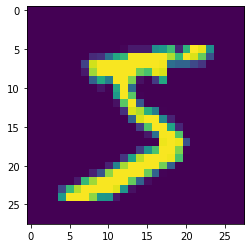

In [33]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [36]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [38]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [39]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(64,3,3,activation='relu'))
model.add(Convolution2D(128,3,3,activation="relu"))
model.add(Convolution2D(256,3,3,activation="relu"))
model.add((MaxPooling2D(pool_size=(2,2))))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(32,3,3,activation="relu"))
model.add(Convolution2D(32,3,3,activation="relu"))
model.add((MaxPooling2D(pool_size=(2,2))))
model.add(Convolution2D(10, 3))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWar

In [40]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 22, 22, 128)       73856     
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 20, 20, 256)       295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 256)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 10, 10, 10)        2570      
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 8, 8, 32)         

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [42]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 21s 353us/step - loss: 0.1521 - acc: 0.9521
Epoch 2/10
60000/60000 [==============================] - 20s 335us/step - loss: 0.0551 - acc: 0.9832
Epoch 3/10
60000/60000 [==============================] - 20s 336us/step - loss: 0.0418 - acc: 0.9868
Epoch 4/10
60000/60000 [==============================] - 20s 338us/step - loss: 0.0343 - acc: 0.9895
Epoch 5/10
60000/60000 [==============================] - 20s 336us/step - loss: 0.0282 - acc: 0.9912
Epoch 6/10
60000/60000 [==============================] - 20s 333us/step - loss: 0.0243 - acc: 0.9922
Epoch 7/10
60000/60000 [==============================] - 20s 340us/step - loss: 0.0216 - acc: 0.9933
Epoch 8/10
60000/60000 [==============================] - 20s 337us/step - loss: 0.0192 - acc: 0.9936
Epoch 9/10
60000/60000 [==============================] - 20s 335us/step - loss: 0.0171 - acc: 0.9943
Epoch 10/10
60000/60000 [==============================] - 20s 336us/step - loss: 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [44]:
print(score)

[0.02625583537554121, 0.9918]


In [0]:
y_pred = model.predict(X_test)

In [46]:
print(y_pred[:9])
print(y_test[:9])

[[2.7754622e-14 6.0898591e-12 2.5794672e-10 1.0087746e-10 4.5352420e-16
  1.2085621e-13 6.5408293e-21 1.0000000e+00 3.1077598e-14 2.2876362e-10]
 [8.4009626e-09 1.0499687e-09 9.9999964e-01 8.1853129e-09 5.9578842e-11
  2.8516139e-12 3.3122347e-09 5.9556255e-14 3.0285662e-07 2.4977737e-10]
 [3.4424430e-09 9.9999142e-01 6.6222515e-07 1.1866760e-09 1.1899415e-06
  4.9217653e-07 1.6751662e-07 4.7768604e-06 2.2688697e-07 9.0681510e-07]
 [9.9997878e-01 2.3378920e-13 9.9199360e-10 7.8841732e-11 9.9347619e-10
  1.7127343e-08 1.8734272e-05 7.1351467e-14 6.1755749e-08 2.4159788e-06]
 [1.4475668e-18 4.9423714e-13 1.6643878e-12 3.6003988e-16 9.9999726e-01
  4.9971383e-14 3.4080529e-13 5.7147598e-12 1.4320279e-12 2.7379481e-06]
 [1.8270707e-09 9.9991632e-01 2.5585734e-07 1.5135793e-10 5.1165903e-06
  2.5331568e-08 1.0954362e-07 7.7094410e-05 1.9729796e-07 9.3287179e-07]
 [4.4581093e-21 3.2753014e-09 6.6254581e-13 9.8357969e-17 9.9999976e-01
  7.0615559e-16 2.2024976e-16 7.7842168e-09 2.1086088e-08 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

IndexError: ignored

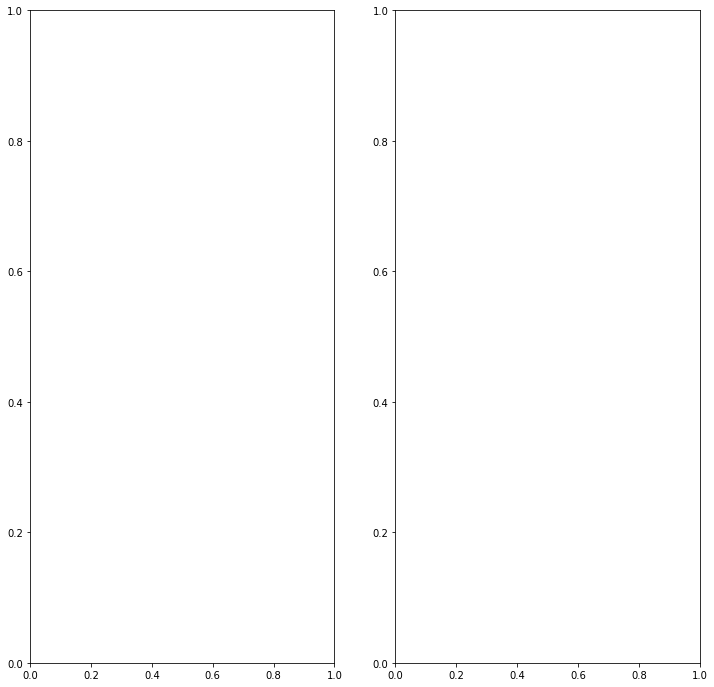

In [48]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()